In [1]:
import numpy as np
import pandas as pd #pip3 install pandas

from cam_to_trajectory import get_index_finger_pose
from cam_to_trajectory import plot_positions
from cam_to_trajectory import get_all_link_poses

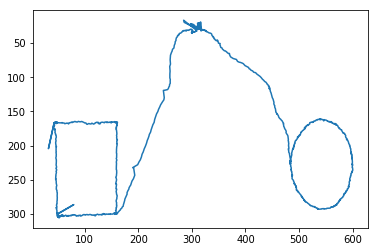

In [3]:
# c1poc, c2poc

# c1poc = get_index_finger_pose('c1poc')
# plot_positions(c1poc)
c2poc = get_index_finger_pose('c2poc')
plot_positions(c2poc)

In [8]:
def get_link_lengths(keypoint_poses):
    """ keypoint_poses is a dictionary of 5 keys, each with a list of associated poses;
        each associated pose in the list is a triple: (x position, y position)
        
        poses = {
            'neck': [(x,y), ...],          # <=> theta_4
            'shoulder': [(x,y), ...],      # <=> theta_3
            'elbow': [(x,y), ...],         # <=> theta_2
            'wrist': [(x,y), ...],         # <=> theta_1
            'finger': [(x,y), ...]         # <=> 
        }
    
        e.g.,
        the first entry for link 'neck':
        
        keypoint_poses['neck'][0] ==> (265.403, 257.642)
    
    """
    ### create imaginary links b1, b2
    # get first pose of neck keypoint
    theta_4 = keypoint_poses['neck'][0]
    # then draw a straight line below it (-100 pixels) and to the left (-20 pixels)
    # to represent base link b1
    theta_b1 = np.array((theta_4[0] - 20, theta_4[1] - 100))
    # b1 is now defined by endpoints theta_4 and theta_b1
    
    #for be, draw a straight line below it (-100 pixels) and to the right (+10 pixels)
    theta_b2 = np.array((theta_b1[0] + 10, theta_b1[1] - 100))
    # b2 is now defined by endpoints theta_b1 and theta_b2
    
    initial_neck = keypoint_poses['neck'][0]
    initial_shoulder = keypoint_poses['shoulder'][0]
    initial_elbow = keypoint_poses['elbow'][0]
    initial_wrist = keypoint_poses['wrist'][0]
    initial_finger = keypoint_poses['finger'][0]
    
    b1_len = np.linalg.norm(theta_b1 - initial_neck)
    b2_len = np.linalg.norm(theta_b1 - theta_b2)
    
    neck_shoulder = np.linalg.norm(initial_neck - initial_shoulder) 
    shoulder_elbow = np.linalg.norm(initial_shoulder - initial_elbow)
    elbow_wrist = np.linalg.norm(initial_elbow - initial_wrist)
    wrist_finger = np.linalg.norm(initial_wrist - initial_finger)
    
    return b1_len, b2_len, neck_shoulder, shoulder_elbow, elbow_wrist, wrist_finger

In [6]:
# get trajectory data for RL alg
c2_poses = get_all_link_poses('c2poc')

In [7]:
get_link_lengths(c2_poses)

(101.9803902718557,
 100.4987562112089,
 62.77749318027919,
 132.87295834743801,
 106.25845431305686,
 71.22928502378781)